In [ ]:
# environment dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('environment_data.csv')

# Remove rows with non-numeric values in 'CO2EmissionRate (mt)' column
data = data[pd.to_numeric(data['CO2EmissionRate (mt)'], errors='coerce').notnull()]

# Convert the values to float
data['CO2EmissionRate (mt)'] = data['CO2EmissionRate (mt)'].astype(float)

# Preprocess the data
scaler = MinMaxScaler()
data['CO2EmissionRate (mt)'] = scaler.fit_transform(data['CO2EmissionRate (mt)'].values.reshape(-1, 1))


In [ ]:
# Split the data into input and output
X = data.drop(['CO2EmissionRate (mt)'], axis=1)
y = data['CO2EmissionRate (mt)']

# Prepare the input sequences for LSTM
X_seq = []
y_seq = []
seq_length = 10  # You can adjust the sequence length as needed

In [ ]:
for i in range(len(data) - seq_length):
  X_seq.append(data.iloc[i:i+seq_length]['CO2EmissionRate (mt)'])
  y_seq.append(data.iloc[i+seq_length]['CO2EmissionRate (mt)'])




X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Reshape the input data for LSTM
X_seq = np.reshape(X_seq, (X_seq.shape[0], X_seq.shape[1], 1))


In [ ]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
import numpy as np

# Select only the numeric columns for input data
X_numeric = data[['CO2EmissionRate (mt)']].values.astype(np.float32)

# Train the model
model.fit(X_numeric, y, epochs=100, batch_size=32)


Epoch 1/100
171/171 [==============================] - 5s 4ms/step - loss: 0.0011
Epoch 2/100
171/171 [==============================] - 1s 4ms/step - loss: 6.6634e-05
Epoch 3/100
171/171 [==============================] - 1s 4ms/step - loss: 2.6841e-06
Epoch 4/100
171/171 [==============================] - 1s 6ms/step - loss: 1.9932e-06
Epoch 5/100
171/171 [==============================] - 1s 6ms/step - loss: 1.7400e-06
Epoch 6/100
171/171 [==============================] - 1s 4ms/step - loss: 1.2253e-06
Epoch 7/100
171/171 [==============================] - 1s 5ms/step - loss: 9.1449e-07
Epoch 8/100
171/171 [==============================] - 1s 6ms/step - loss: 5.9651e-07
Epoch 9/100
171/171 [==============================] - 1s 8ms/step - loss: 3.1749e-07
Epoch 10/100
171/171 [==============================] - 1s 8ms/step - loss: 2.3510e-07
Epoch 11/100
171/171 [==============================] - 1s 6ms/step - loss: 1.4265e-07
Epoch 12/100
171/171 [==============================] - 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('environment_data.csv')

# Remove rows with non-numeric values in 'CO2EmissionRate (mt)' column
data = data[pd.to_numeric(data['CO2EmissionRate (mt)'], errors='coerce').notnull()]

# Convert the values to float
data['CO2EmissionRate (mt)'] = data['CO2EmissionRate (mt)'].astype(float)

# Preprocess the data
scaler = MinMaxScaler()
data['CO2EmissionRate (mt)'] = scaler.fit_transform(data['CO2EmissionRate (mt)'].values.reshape(-1, 1))

# Prepare the input sequences for LSTM
X_seq = []
y_seq = []
seq_length = 10  # You can adjust the sequence length as needed
for i in range(len(data) - seq_length):
    X_seq.append(data.iloc[i:i+seq_length]['CO2EmissionRate (mt)'])
    y_seq.append(data.iloc[i+seq_length]['CO2EmissionRate (mt)'])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Reshape the input data for LSTM
X_seq = np.reshape(X_seq, (X_seq.shape[0], X_seq.shape[1], 1))

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_seq.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the testing set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/100
119/119 [==============================] - 7s 18ms/step - loss: 0.0016 - val_loss: 9.7648e-04
Epoch 2/100
119/119 [==============================] - 1s 11ms/step - loss: 0.0016 - val_loss: 9.4478e-04
Epoch 3/100
119/119 [==============================] - 1s 12ms/step - loss: 0.0016 - val_loss: 9.3879e-04
Epoch 4/100
119/119 [==============================] - 1s 11ms/step - loss: 0.0016 - val_loss: 9.6649e-04
Epoch 5/100
119/119 [==============================] - 1s 11ms/step - loss: 0.0016 - val_loss: 8.4150e-04
Epoch 6/100
119/119 [==============================] - 1s 11ms/step - loss: 0.0016 - val_loss: 9.4890e-04
Epoch 7/100
119/119 [==============================] - 2s 13ms/step - loss: 0.0016 - val_loss: 9.2756e-04
Epoch 8/100
119/119 [==============================] - 3s 26ms/step - loss: 0.0015 - val_loss: 9.2573e-04
Epoch 9/100
119/119 [==============================] - 3s 27ms/step - loss: 0.0016 - val_loss: 9.3768e-04
Epoch 10/100
119/119 [========================

26/26 [==============================] - 1s 5ms/step


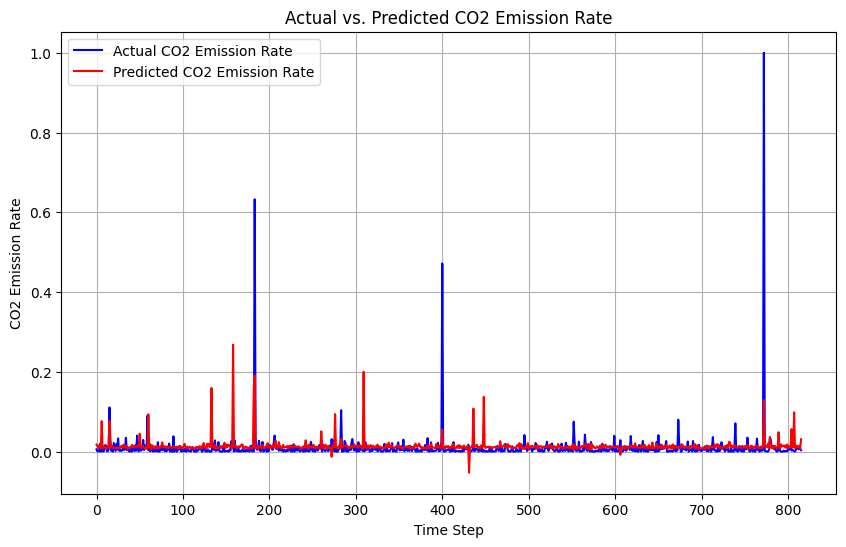

In [2]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual CO2 Emission Rate', color='blue')
plt.plot(y_pred, label='Predicted CO2 Emission Rate', color='red')
plt.title('Actual vs. Predicted CO2 Emission Rate')
plt.xlabel('Time Step')
plt.ylabel('CO2 Emission Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pickle

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Save the trained model using pickle
with open('lstm_environment.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully as 'lstm_environment.pkl'")


Epoch 1/100
119/119 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2/100
119/119 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 3/100
119/119 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 4/100
119/119 [==============================] - 2s 13ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 5/100
119/119 [==============================] - 2s 17ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 6/100
119/119 [==============================] - 2s 19ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/100
119/119 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/100
119/119 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 9/100
119/119 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 10/100
119/119 [==============================] - 1s 12ms/step - loss: 0.001

In [ ]:
# Load the model from the pickle file
with open('lstm_environment.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Evaluate the loaded model on the testing set
loss = loaded_model.evaluate(X_test, y_test)
print("Test Loss (Loaded Model):", loss)


26/26 [==============================] - 1s 4ms/step - loss: 0.0027
Test Loss (Loaded Model): 0.002654297975823283


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'model' is your trained LSTM model
# Assuming 'X_test' is your test data and 'y_test' is the corresponding true CO2 emission rates

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

26/26 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 0.001755682812549873
Mean Absolute Error (MAE): 0.010509478319629888
Root Mean Squared Error (RMSE): 0.04190086887583446
R-squared (R2) Score: 0.14633990465933033


# enerygy dataset

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load the dataset
data = pd.read_csv('energy_data.csv')

# Convert the 'Datetime' column to datetime format and set it as the index
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

# Select a subset of the data (e.g., 6,000 rows)
data = data[:6000]


In [6]:

# Preprocess the data
scaler = MinMaxScaler()
data['PJME_MW'] = scaler.fit_transform(data['PJME_MW'].values.reshape(-1, 1))

# Prepare the input sequences for LSTM
X_seq = []
y_seq = []
seq_length = 10  # You can adjust the sequence length as needed
for i in range(len(data) - seq_length):
    X_seq.append(data.iloc[i:i+seq_length]['PJME_MW'])
    y_seq.append(data.iloc[i+seq_length]['PJME_MW'])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

In [7]:
# Reshape the input data for LSTM
X_seq = np.reshape(X_seq, (X_seq.shape[0], X_seq.shape[1], 1))

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [8]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_seq.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the testing set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/100
132/132 [==============================] - 11s 18ms/step - loss: 0.0266 - val_loss: 0.0130
Epoch 2/100
132/132 [==============================] - 1s 11ms/step - loss: 0.0106 - val_loss: 0.0068
Epoch 3/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0075 - val_loss: 0.0053
Epoch 4/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0055 - val_loss: 0.0030
Epoch 5/100
132/132 [==============================] - 2s 11ms/step - loss: 0.0044 - val_loss: 0.0024
Epoch 6/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0037 - val_loss: 0.0020
Epoch 7/100
132/132 [==============================] - 2s 18ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 8/100
132/132 [==============================] - 2s 15ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 9/100
132/132 [==============================] - 2s 11ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 10/100
132/132 [==============================] - 2s 11ms/step - loss: 0.00

29/29 [==============================] - 1s 3ms/step


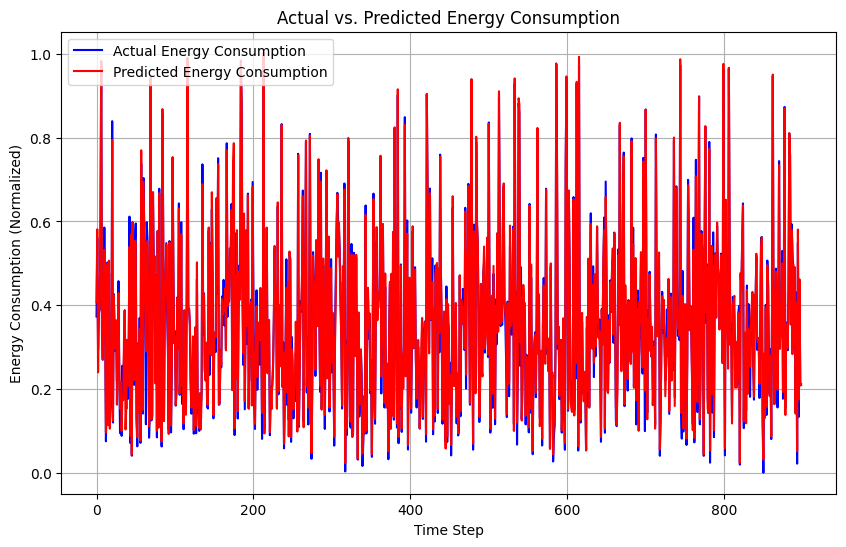

In [10]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Energy Consumption', color='blue')
plt.plot(y_pred, label='Predicted Energy Consumption', color='red')
plt.title('Actual vs. Predicted Energy Consumption')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (Normalized)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pickle

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Save the trained model using pickle
with open('lstm_energy.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully as 'lstm_energy.pkl'")


Epoch 1/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0013 - val_loss: 6.8462e-04
Epoch 2/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0013 - val_loss: 6.5747e-04
Epoch 3/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0012 - val_loss: 8.2115e-04
Epoch 4/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0013 - val_loss: 7.1447e-04
Epoch 5/100
132/132 [==============================] - 2s 14ms/step - loss: 0.0012 - val_loss: 8.5729e-04
Epoch 6/100
132/132 [==============================] - 3s 19ms/step - loss: 0.0013 - val_loss: 6.9884e-04
Epoch 7/100
132/132 [==============================] - 2s 15ms/step - loss: 0.0012 - val_loss: 8.3599e-04
Epoch 8/100
132/132 [==============================] - 2s 11ms/step - loss: 0.0013 - val_loss: 6.9437e-04
Epoch 9/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0012 - val_loss: 6.8760e-04
Epoch 10/100
132/132 [========================

In [ ]:
# Load the model from the pickle file
with open('lstm_energy.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Evaluate the loaded model on the testing set
loss = loaded_model.evaluate(X_test, y_test)
print("Test Loss (Loaded Model):", loss)


29/29 [==============================] - 1s 4ms/step - loss: 7.1246e-04
Test Loss (Loaded Model): 0.0007124622934497893


prediction on new data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create new input data
new_data = pd.DataFrame({
    'Datetime': ['1/1/2003 1:00', '1/1/2003 2:00', '1/1/2003 3:00', '1/1/2003 4:00', '1/1/2003 5:00'],
    'PJME_MW': [-0.8, -1.1, -1.3, -1.2, -0.9]
})

# Convert 'Datetime' column to datetime format
new_data['Datetime'] = pd.to_datetime(new_data['Datetime'])

# Normalize 'PJME_MW' values using MinMaxScaler
scaler = MinMaxScaler()
new_data['PJME_MW'] = scaler.fit_transform(new_data['PJME_MW'].values.reshape(-1, 1))

# Display the new input data
print("New Input Data:")
print(new_data)


New Input Data:
             Datetime  PJME_MW
0 2003-01-01 01:00:00      1.0
1 2003-01-01 02:00:00      0.4
2 2003-01-01 03:00:00      0.0
3 2003-01-01 04:00:00      0.2
4 2003-01-01 05:00:00      0.8


# finace dataset

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load the dataset
data = pd.read_csv('finance_data.csv')

# Convert the 'date' column to datetime format and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Select a subset of 6,000 rows from the dataset
data = data.sample(n=6000, random_state=42)

# Drop the 'Name' column
data = data.drop('Name', axis=1)

# Preprocess the data by scaling the values using Min-Max Scaler
scaler = MinMaxScaler()
data[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(data[['open', 'high', 'low', 'close', 'volume']])

# Prepare the input sequences for LSTM by creating a sequence of 10 previous values for each row
X_seq = []
y_seq = []
seq_length = 10
for i in range(len(data) - seq_length):
    X_seq.append(data.iloc[i:i+seq_length, :-1].values)
    y_seq.append(data.iloc[i+seq_length, -1])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Ensure X_seq and y_seq have the same length
if len(X_seq) != len(y_seq):
    min_length = min(len(X_seq), len(y_seq))
    X_seq = X_seq[:min_length]
    y_seq = y_seq[:min_length]

# Reshape the input data for LSTM
X_seq = np.reshape(X_seq, (-1, seq_length, 5))

# Split the data into training, validation, and testing sets
if len(X_seq) != len(y_seq):
    min_length = min(len(X_seq), len(y_seq))
    X_seq = X_seq[:min_length]
    y_seq = y_seq[:min_length]
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_seq.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the testing set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/100
105/105 [==============================] - 8s 23ms/step - loss: 0.0022 - val_loss: 7.6354e-04
Epoch 2/100
105/105 [==============================] - 2s 18ms/step - loss: 0.0022 - val_loss: 7.7656e-04
Epoch 3/100
105/105 [==============================] - 2s 17ms/step - loss: 0.0022 - val_loss: 7.5527e-04
Epoch 4/100
105/105 [==============================] - 1s 12ms/step - loss: 0.0022 - val_loss: 7.6923e-04
Epoch 5/100
105/105 [==============================] - 1s 11ms/step - loss: 0.0022 - val_loss: 9.0773e-04
Epoch 6/100
105/105 [==============================] - 1s 12ms/step - loss: 0.0022 - val_loss: 7.9146e-04
Epoch 7/100
105/105 [==============================] - 1s 11ms/step - loss: 0.0022 - val_loss: 7.8647e-04
Epoch 8/100
105/105 [==============================] - 1s 12ms/step - loss: 0.0022 - val_loss: 9.7777e-04
Epoch 9/100
105/105 [==============================] - 1s 11ms/step - loss: 0.0022 - val_loss: 8.4022e-04
Epoch 10/100
105/105 [========================

23/23 [==============================] - 1s 5ms/step


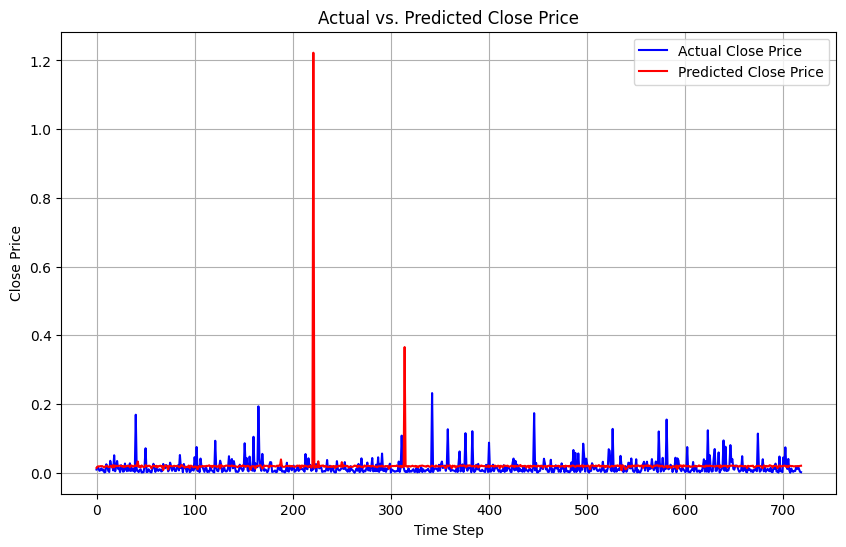

In [4]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='red')
plt.title('Actual vs. Predicted Close Price')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Compute R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)


23/23 [==============================] - 2s 9ms/step
Mean Absolute Error (MAE): 0.016706424452196694
Mean Squared Error (MSE): 0.003719846978833111
R-squared (R2) Score: -5.716880091485793


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load the dataset
data = pd.read_csv('finance_data.csv')

# Convert the 'date' column to datetime format and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Select a subset of 6,000 rows from the dataset
data = data.sample(n=8000)

# Drop the 'Name' column
data = data.drop('Name', axis=1)

# Preprocess the data by scaling the values using Min-Max Scaler
scaler = MinMaxScaler()
data[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(data[['open', 'high', 'low', 'close', 'volume']])

# Prepare the input sequences for LSTM by creating a sequence of 10 previous values for each row
X_seq = []
y_seq = []
seq_length = 10
for i in range(len(data) - seq_length):
    X_seq.append(data.iloc[i:i+seq_length, :-1].values)
    y_seq.append(data.iloc[i+seq_length, -1])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Ensure X_seq and y_seq have the same length
if len(X_seq) != len(y_seq):
    min_length = min(len(X_seq), len(y_seq))
    X_seq = X_seq[:min_length]
    y_seq = y_seq[:min_length]

# Reshape the input data for LSTM
X_seq = np.reshape(X_seq, (-1, seq_length, 5))

# Split the data into training, validation, and testing sets
if len(X_seq) != len(y_seq):
    min_length = min(len(X_seq), len(y_seq))
    X_seq = X_seq[:min_length]
    y_seq = y_seq[:min_length]
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_seq.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the testing set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/100
140/140 [==============================] - 7s 26ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 2/100
140/140 [==============================] - 2s 15ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 3/100
140/140 [==============================] - 2s 13ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 4/100
140/140 [==============================] - 2s 12ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 5/100
140/140 [==============================] - 2s 12ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 6/100
140/140 [==============================] - 2s 13ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 7/100
140/140 [==============================] - 2s 13ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 8/100
140/140 [==============================] - 3s 20ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 9/100
140/140 [==============================] - 2s 16ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 10/100
140/140 [==============================] - 2s 12ms/step - loss: 0.001

In [ ]:
import pickle

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Save the trained model using pickle
with open('lstm_finance.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully as 'lstm_finance.pkl'")


Epoch 1/100
140/140 [==============================] - 2s 13ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 2/100
140/140 [==============================] - 3s 19ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 3/100
140/140 [==============================] - 3s 19ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 4/100
140/140 [==============================] - 2s 13ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 5/100
140/140 [==============================] - 2s 14ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 6/100
140/140 [==============================] - 2s 14ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 7/100
140/140 [==============================] - 2s 14ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 8/100
140/140 [==============================] - 2s 14ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 9/100
140/140 [==============================] - 3s 19ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 10/100
140/140 [==============================] - 2s 17ms/step - loss: 0.001

In [ ]:
# Load the model from the pickle file
with open('lstm_finance.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Evaluate the loaded model on the testing set
loss = loaded_model.evaluate(X_test, y_test)
print("Test Loss (Loaded Model):", loss)


30/30 [==============================] - 1s 4ms/step - loss: 8.8923e-04
Test Loss (Loaded Model): 0.0008892284822650254


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Compute R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)


34/34 [==============================] - 1s 6ms/step
Mean Absolute Error (MAE): 0.027624706627144828
Mean Squared Error (MSE): 0.003077501394185387
R-squared (R2) Score: -0.005653983862505374
